## Haberman dataset EDA
### Objective:
#### To find out what distinguising feature/'s were present in those cancer patients who survived 5 years or more after the opeartion vs those who unfortunately did not.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

haberman = pd.read_csv('haberman.csv')

# 1. Familiariziation with dataset

In [5]:
print(haberman.shape)

(306, 4)


In [6]:
print(haberman.columns) #Features

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [7]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
haberman.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

In [10]:
haberman['year'].unique()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68], dtype=int64)

In [11]:
haberman['year'] = ('19' + haberman['year'].astype(str)).astype(int) #Prefixing year column with '19' to improve readability

In [12]:
haberman['year'].value_counts()

1958    36
1964    31
1963    30
1960    28
1965    28
1966    28
1959    27
1961    26
1967    25
1962    23
1968    13
1969    11
Name: year, dtype: int64

In [13]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int32
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 8.5 KB


In [14]:
haberman.head()

,age,year,nodes,status
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1


In [15]:
#Renaming columns to make it more readable
haberman.rename(columns = {'year':'year_of_opr','nodes':'no_of_axillary_nodes','status':'survived_5y'}, inplace = True)

In [16]:
haberman.head()

,age,year_of_opr,no_of_axillary_nodes,survived_5y
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1


In [17]:
haberman['survived_5y'].replace(2,0,inplace=True) #New values--> 1: survived 5 year or more; 0:Did not survived 5 year or more

In [18]:
haberman['survived_5y'].value_counts()

1    225
0     81
Name: survived_5y, dtype: int64

In [19]:
#Create a new dataframe for those who survived and for those who didn't with sorted values of axillary nodes.
h_survived = haberman.loc[haberman['survived_5y']==1].sort_values('no_of_axillary_nodes',ignore_index=True)
h_not_survived = haberman.loc[haberman['survived_5y']==0].sort_values('no_of_axillary_nodes',ignore_index=True)
print(h_survived.tail())
print('*'*75)
print(h_not_survived.tail())

     age  year_of_opr  no_of_axillary_nodes  survived_5y
220   64         1965                    22            1
221   60         1961                    25            1
222   63         1961                    28            1
223   34         1958                    30            1
224   54         1967                    46            1
***************************************************************************
    age  year_of_opr  no_of_axillary_nodes  survived_5y
76   47         1963                    23            0
77   54         1965                    23            0
78   53         1963                    24            0
79   59         1962                    35            0
80   43         1958                    52            0


In [20]:
h_survived.describe().transpose() #Survived patients stats

,count,mean,std,min,25%,50%,75%,max
age,225.0,52.017778,11.012154,30.0,43.0,52.0,60.0,77.0
year_of_opr,225.0,1962.862222,3.222915,1958.0,1960.0,1963.0,1966.0,1969.0
no_of_axillary_nodes,225.0,2.791111,5.870318,0.0,0.0,0.0,3.0,46.0
survived_5y,225.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [21]:
h_not_survived.describe().transpose() #Didnt survived patients stats

,count,mean,std,min,25%,50%,75%,max
age,81.0,53.679012,10.167137,34.0,46.0,53.0,61.0,83.0
year_of_opr,81.0,1962.827160,3.342118,1958.0,1959.0,1963.0,1965.0,1969.0
no_of_axillary_nodes,81.0,7.456790,9.185654,0.0,1.0,4.0,11.0,52.0
survived_5y,81.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [22]:
haberman.groupby('survived_5y')['no_of_axillary_nodes'].agg('value_counts',normalize=True).sort_index()

survived_5y  no_of_axillary_nodes
0            0                       0.234568
             1                       0.098765
             2                       0.061728
             3                       0.086420
             4                       0.037037
             5                       0.049383
             6                       0.037037
             7                       0.024691
             8                       0.024691
             9                       0.049383
             10                      0.012346
             11                      0.037037
             12                      0.012346
             13                      0.049383
             14                      0.012346
             15                      0.024691
             17                      0.012346
             19                      0.024691
             20                      0.012346
             21                      0.012346
             22                      0.012346


#### Observations from the descriptive statistics:
##### 1. Average number of axillary nodes found in those who didn't survived were almost 3 times more than those found in survived group.
##### 2. Number of nodes found in both survived and not survived group seems to have left skew.
##### 3. Initial analysis of data suggest a fatter right tail for nodes distribution of the group "not survived"
##### 4. Age is not a distiguishing feature in both groups

# 2. Analysis

### 2.1 Histogram

c:\users\manra\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\manra\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


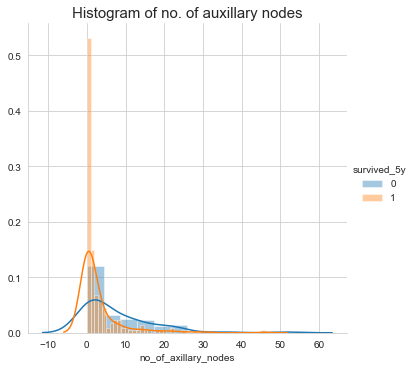

In [23]:
#Histogram of Number of Auxillary nodes
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='survived_5y', height=5).map(sns.distplot,"no_of_axillary_nodes").add_legend()
plt.title('Histogram of no. of auxillary nodes',fontsize=15)
plt.show()

c:\users\manra\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\manra\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


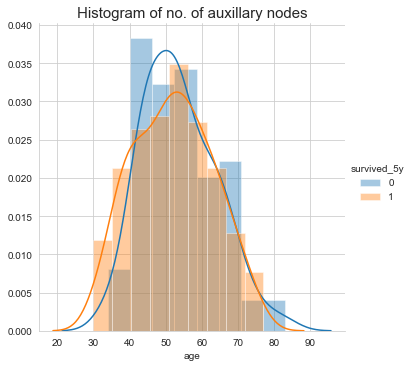

In [24]:
#Histogram of Age
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='survived_5y', height=5).map(sns.distplot,"age").add_legend()
plt.title('Histogram of no. of auxillary nodes',fontsize=15)
plt.show()

c:\users\manra\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\manra\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


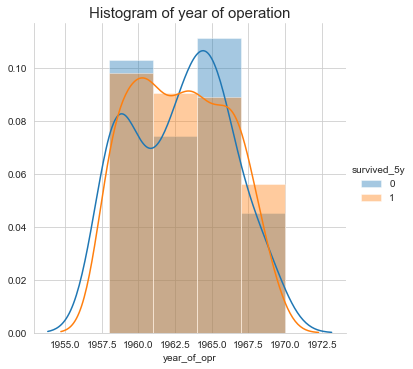

In [25]:
#Histogram of Number of Year of Operation
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='survived_5y', height=5).map(sns.distplot,"year_of_opr",bins=[1955,1958,1961,1964,1967,1970]).add_legend()
plt.title('Histogram of year of operation',fontsize=15)
plt.show()

In [26]:
### Histogram of only number of auxillary nodes gives some meaningful insights.

### 2.2 Box-plot, Violin plot and contour plot

### 2.2.1 Box plot

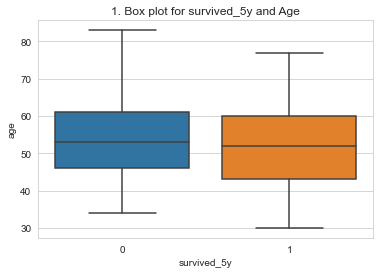

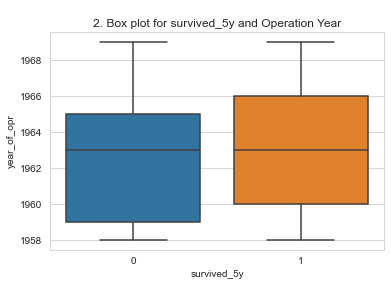

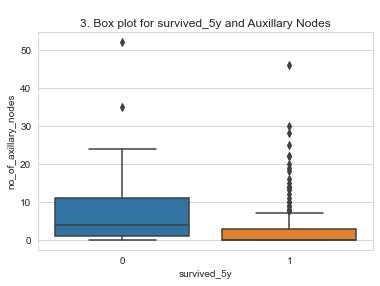

In [27]:
sns.boxplot(x = "survived_5y" , y = "age", data = haberman )
plt.title("1. Box plot for survived_5y and Age")
plt.show()

sns.boxplot(x = "survived_5y" , y = "year_of_opr", data = haberman )
plt.title("\n2. Box plot for survived_5y and Operation Year")
plt.show()

sns.boxplot(x = 'survived_5y', y = 'no_of_axillary_nodes', data = haberman)
plt.title("\n3. Box plot for survived_5y and Auxillary Nodes")
plt.show()

### 2.2.2 Violin plot

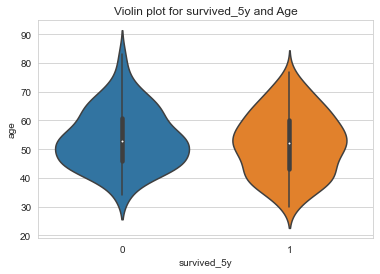

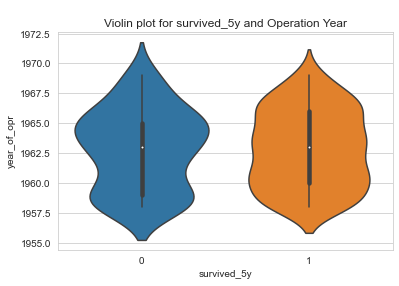

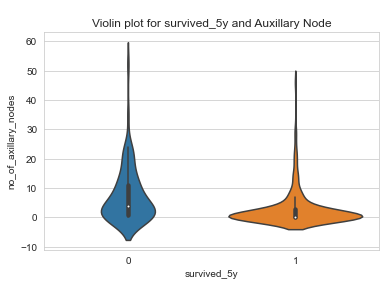

In [28]:
sns.violinplot(x = 'survived_5y', y = 'age', data = haberman)
plt.title("Violin plot for survived_5y and Age")
plt.show()

sns.violinplot(x = 'survived_5y', y = 'year_of_opr', data = haberman)
plt.title("\nViolin plot for survived_5y and Operation Year")
plt.show()

sns.violinplot(x = 'survived_5y', y = 'no_of_axillary_nodes', data = haberman)
plt.title("\nViolin plot for survived_5y and Auxillary Node")
plt.show()

### 2.2.3 Countour plot

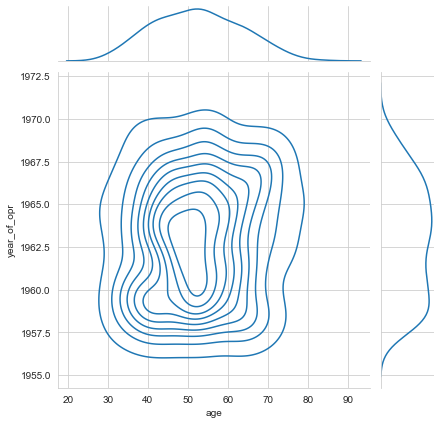

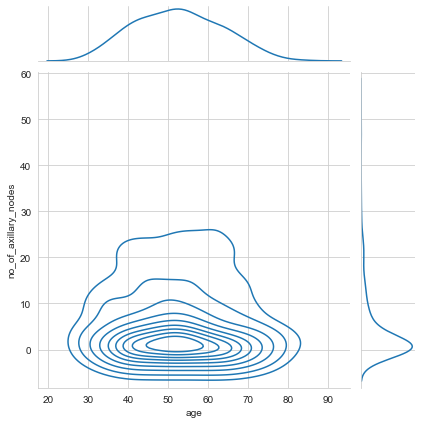

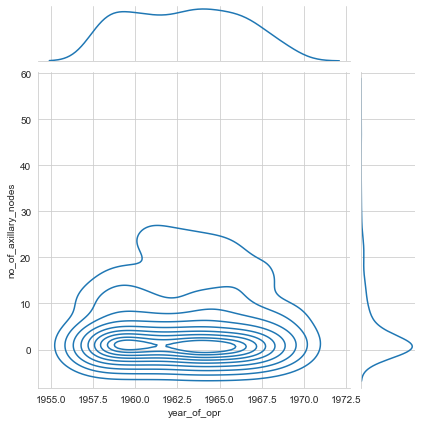

In [29]:
sns.jointplot(x="age",y="year_of_opr",data=haberman, kind="kde")
plt.show()

sns.jointplot(x="age",y="no_of_axillary_nodes",data=haberman, kind="kde")
plt.show()

sns.jointplot(x="year_of_opr",y="no_of_axillary_nodes",data=haberman, kind="kde")
plt.show()

### 2.3 PDF and CDF

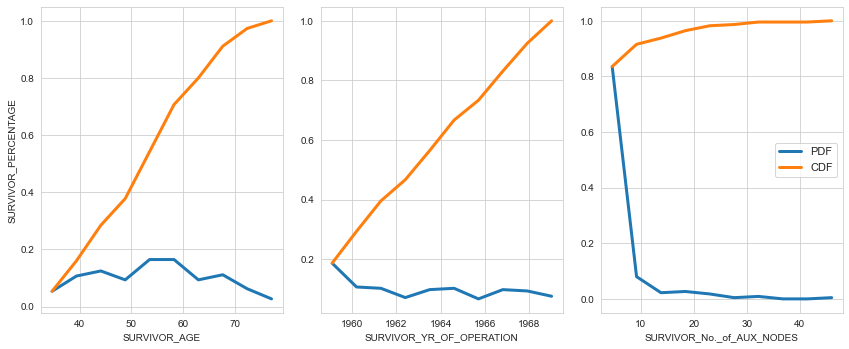

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(5)
fig.set_figwidth(12)
fig.tight_layout()

plt.subplot(131)
counts,bin_edges=np.histogram(h_survived["age"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,lw=3.0)
plt.plot(bin_edges[1:],cdf,lw=3.0)
plt.xlabel('SURVIVOR_AGE')
plt.ylabel("SURVIVOR_PERCENTAGE")
fig.tight_layout() 

plt.subplot(132)
counts,bin_edges=np.histogram(h_survived["year_of_opr"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,lw=3.0)
plt.plot(bin_edges[1:],cdf,lw=3.0)
plt.xlabel('SURVIVOR_YR_OF_OPERATION')

plt.subplot(133)
counts,bin_edges=np.histogram(h_survived["no_of_axillary_nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,lw=3.0)
plt.plot(bin_edges[1:],cdf,lw=3.0)
plt.xlabel('SURVIVOR_No._of_AUX_NODES')
plt.legend(['PDF', 'CDF'], loc = 5,prop={'size': 11})

plt.show()

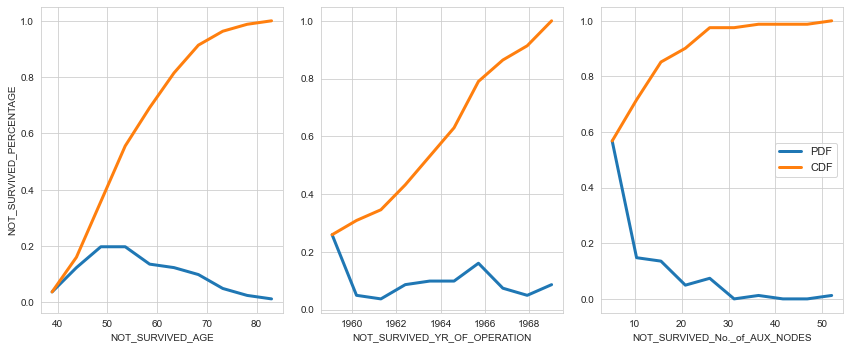

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(5)
fig.set_figwidth(12)
fig.tight_layout()

plt.subplot(131)
counts,bin_edges=np.histogram(h_not_survived["age"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,lw=3.0)
plt.plot(bin_edges[1:],cdf,lw=3.0)
plt.xlabel('NOT_SURVIVED_AGE')
plt.ylabel("NOT_SURVIVED_PERCENTAGE")
fig.tight_layout() 

plt.subplot(132)
counts,bin_edges=np.histogram(h_not_survived["year_of_opr"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,lw=3.0)
plt.plot(bin_edges[1:],cdf,lw=3.0)
plt.xlabel('NOT_SURVIVED_YR_OF_OPERATION')

plt.subplot(133)
counts,bin_edges=np.histogram(h_not_survived["no_of_axillary_nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,lw=3.0)
plt.plot(bin_edges[1:],cdf,lw=3.0)
plt.xlabel('NOT_SURVIVED_No._of_AUX_NODES')
plt.legend(['PDF', 'CDF'], loc = 5,prop={'size': 11})

plt.show()

##### Observations:
##### 1. Higher auxillary nodes doesn't correlate with higher chances of death. Alternatively, this also means that a patient do not survive higher node count hence less observations at higher node count.
##### 2. Age does not seem to provide any meaningful insight as age increases the death rate in non-survivors is decreasing.
##### 3. By inital analysis, year of operation cdf is slightly curved upward as year advances giving a glimpse of answer lying here.
##### 4. A bivariate anaysis will throw some light on other feature/'s which can better explain the non-survivor group.


## 3. Bivariate Analysis

## 3.1 Scatter plot

In [32]:
haberman.columns

Index(['age', 'year_of_opr', 'no_of_axillary_nodes', 'survived_5y'], dtype='object')

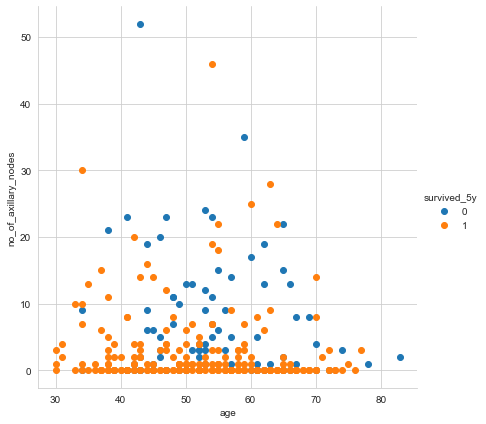

In [33]:
# AGE vs Number of Auxillary nodes

sns.FacetGrid(haberman, hue="survived_5y", height=6) \
   .map(plt.scatter,"age","no_of_axillary_nodes", ) \
   .add_legend();
plt.show();

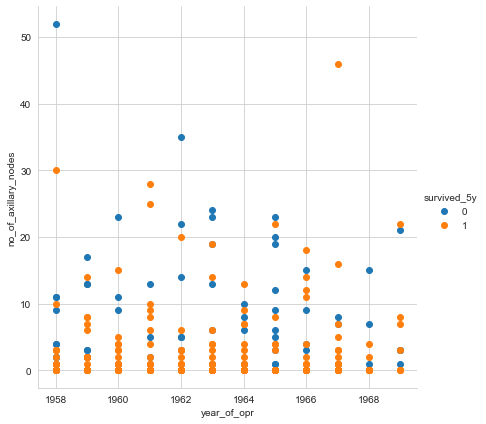

In [34]:
# OPERATION YEAR vs AUXILLARY NODES
sns.FacetGrid(haberman, hue="survived_5y", height=6) \
   .map(plt.scatter, "year_of_opr", "no_of_axillary_nodes") \
   .add_legend();

plt.show();

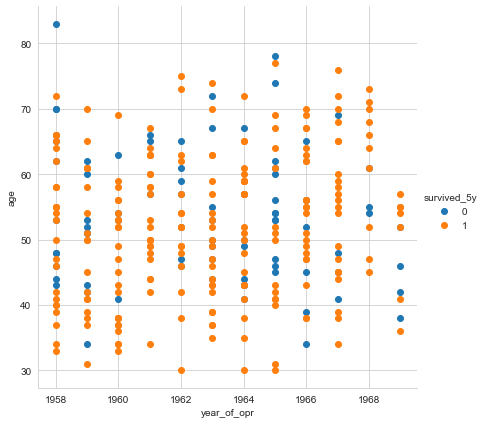

In [35]:
#AGE vs OPERATION YEAR
sns.FacetGrid(haberman, hue="survived_5y", height=6) \
   .map(plt.scatter, "year_of_opr", "age") \
   .add_legend();
plt.show();

### 3.2 Pair plot

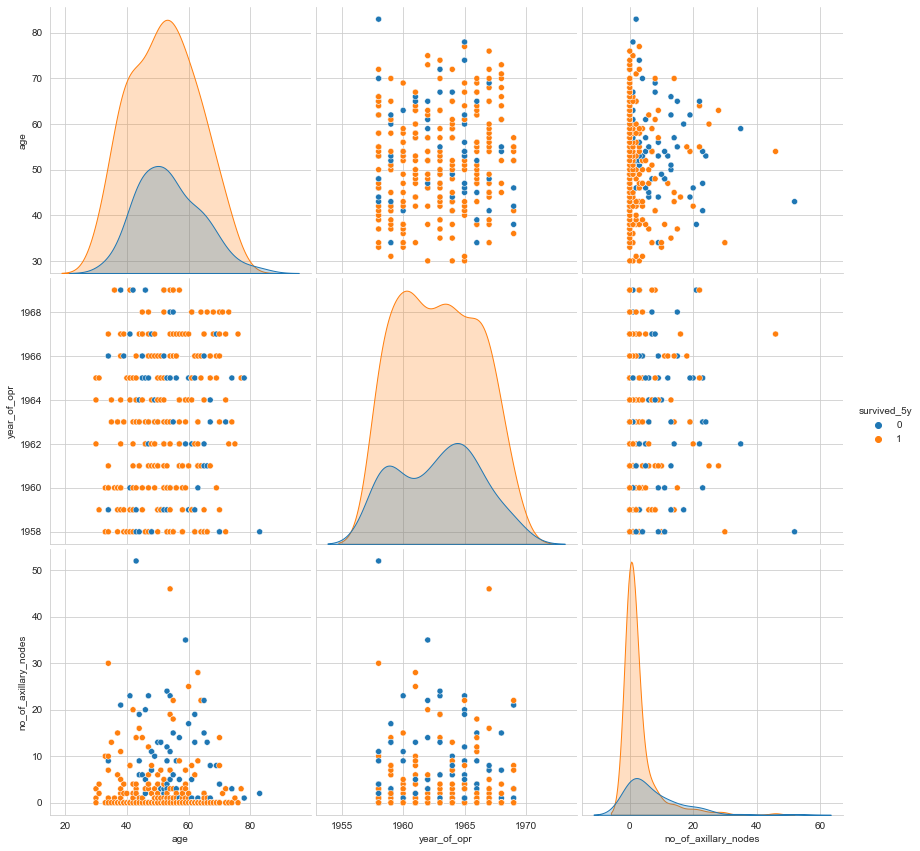

In [36]:
plt.close()
sns.pairplot(haberman,hue="survived_5y",height=4)
plt.show()

In [41]:
import plotly.express as px
fig = px.scatter_3d(haberman, x='age', y='no_of_axillary_nodes', z='survived_5y',
              color='survived_5y')
fig.show()

In [42]:
fig = px.scatter_3d(haberman, x='no_of_axillary_nodes', y='year_of_opr', z='survived_5y',
              color='survived_5y')
fig.show()

## Final Obersations:

In [333]:
!pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits
You should consider upgrading via the 'c:\users\manra\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


### 1. This is a classification problem of whether a patient will survive or not given number of auxillary nodes, year of operation and his/her  age.
### 2. The dataset is not balanced for survivor and non-survivor group with 225 and 81 observations resp.
### 3. As year increases we are seeing lesser number of auxillary nodes in both groups.
    (maybe because of advancement in treatment technology)
### 4. As age increases if auxillary node increases their is higher chances of not surviving as seen from 3d scatter plot.
### 5. As year increases even if the auxiallry node increases higher number of patients are surviving than not surviving as seen from 3d scatter plot.

### Conclusion: The year of operation makes a difference in survivability along with number of auxillary nodes. As age increases higher number of auxillary nodes in sample seems to drop.